In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/cea/PycharmProjects/EDA/pandas workout/data frames/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df_sample=df.loc[(df['BMI']==33.6) & (df['Glucose']==148)] [['Pregnancies','Glucose','BMI']]
df_sample

,Pregnancies,Glucose,BMI
0,6,148,33.6


In [5]:
df_s=df.sort_values(by='Pregnancies') [['Pregnancies','Glucose','BMI']].head()
df_s

,Pregnancies,Glucose,BMI
467,0,97,36.8
109,0,95,37.4
452,0,91,39.9
449,0,120,30.5
448,0,104,33.6


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [9]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
knn=KNeighborsClassifier(n_neighbors=7)
nb=GaussianNB()
sv=SVC()

In [13]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [14]:
models=[knn,nb,sv]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"model is {model}")
    print(y_pred)
    print("*"*15)
    print(f"accuracy score is {accuracy_score(y_test,y_pred)}")
    print(classification_report(y_test,y_pred))
    print("-"*50)


model is KNeighborsClassifier(n_neighbors=7)
[0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0]
***************
accuracy score is 0.7056277056277056
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       151
           1       0.58      0.53      0.55        80

    accuracy                           0.71       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.71      0.70       231

--------------------------------------------------
model is GaussianNB()
[0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)
print(f'accuracy is {accuracy_score(y_test,y_pred)}')

accuracy is 0.7532467532467533


In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred2=rf.predict(x_test)
print(f"accuracy score is {accuracy_score(y_test,y_pred2)}")

accuracy score is 0.7489177489177489


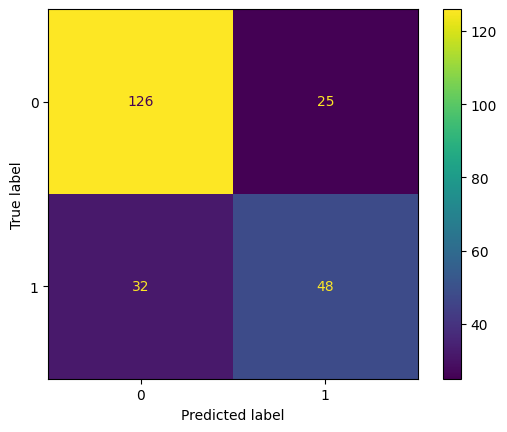

In [17]:
label=[0,1]
matrix=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(matrix,display_labels=label)
dis.plot()